# Notebook Iteracion 6 Modelado

### Objetivo: Implementación de clustering como originador de una nueva variable que categoriza los precios y se usa como entrada para el modelo de predicción de precios:
- Analisis de distribución de la variable precio
- Analisis de variables predictoras
- Ejecución de clustering
- Entrenamiento de modelos


In [22]:
# Funciones generales
import sys
sys.path.append('../')
# A medida que avanzan las iteraciones se crearan mas funcinoes transversales
from funciones import *

# Tuneo de hiperparámetros
from sklearn.model_selection import ParameterGrid

# Libreria para manejo de balance de datos
import smogn


# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

**Lectura de datos**
Dada la estabilidad que muestra el resultado de la iteracion 2 sobre las variables predictoras, se utiliza la base resultante de esta

In [23]:
import os 
# get current directory
path = os.getcwd()
# parent directory
path = os.path.abspath('../')
data_model = pd.read_csv(path + "/iteracion_2/datos_iteracion_2.csv")
data_model.head()

,precio,zona,barrio_sector,baños_familiares,area_bruta,numero_niveles,parqueaderos,alcobas_familiares,estrato,area_total,...,closet_de_linos,biblioteca,parqueadero_visitantes,gimnasio,piscina,salon_social,dispositivos_automatizacion,alarma,tipo_cocina_freq,tipo_pisos_freq
0,1100000.0,centro,castilla,1.0,95.0,1.0,0.0,3.0,0.0,95.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.861534,0.596709
1,950000.0,centro,el salvador,1.0,70.0,1.0,0.0,2.0,3.0,70.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.081652,0.596709
2,970000.0,centro,los angeles,1.0,38.0,1.0,0.0,1.0,4.0,38.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.081652,0.596709
3,1400000.0,centro,prado,1.0,50.0,1.0,1.0,2.0,0.0,50.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.861534,0.596709
4,800000.0,centro,12 de octubre,1.0,92.0,1.0,0.0,3.0,2.0,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.861534,0.596709


**Distribución de variable precio**

Variable precio en su distribución original luego de las iteraciones 1 y 3, esta será la distribución sobre la cúal se aplique el clustering

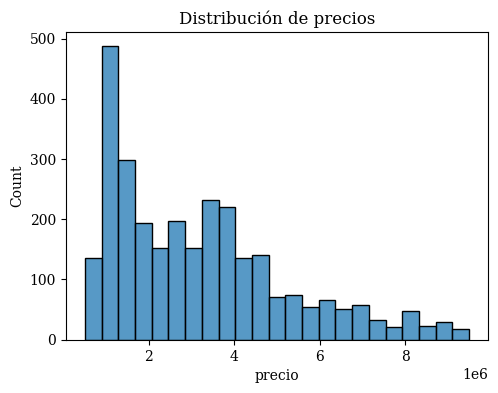

In [24]:
graficar_distribucion_histograma(data_model, 'precio', 'Distribución de precios')

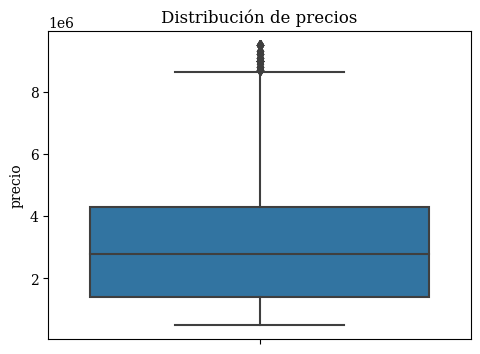

In [25]:
graficar_distribucion_boxplot(data_model, 'precio', 'Distribución de precios')

**Vriables predictoras**

In [26]:
pred_columns = [
    'baños_familiares',
    'area_bruta', 
    'numero_niveles',
    'parqueaderos', 
    'alcobas_familiares', 
    'estrato', 
    'area_total',
    'juegos_infantiles', 
    'balcon', 
    'zona_ropas', 
    'camaras_cctv',
    'cancha_polideportiva', 
    'ascensor', 
    'cancha_squash', 
    'zona_bbq',
    'patio', 
    'unidad_cerrada_conjunto', 
    'zonas_verdes',
    'aire_acondicionado', 
    'jacuzzi', 
    'red_de_Gas', 
    'turco', 
    'porteria_24_7',
    'sauna', 
    'calentador_de_agua', 
    'terraza', 
    'closet_de_linos',
    'biblioteca', 
    'parqueadero_visitantes', 
    'gimnasio', 
    'piscina',
    'salon_social', 
    'dispositivos_automatizacion', 
    'alarma',
    'tipo_cocina_freq', 
    'tipo_pisos_freq'
]

**Variables predictoras**

En la iteración 2 el analisis de distribución y correlaciones dió como resultado la eliminación de las variables:

- columns_disc_corr
- numero_niveles
- zona_ropas
- camaras_cctv
- cancha_polideportiva
- cancha_squash
- zona_bbq
- patio
- aire_acondicionado
- jacuzzi
- red_de_Gas
- terraza
- dispositivos_automatizacion
- alarma
- area_total
- porteria_24_7

Se reutiliza estas variables, sin embargo, por criterio del negocio se conservan las siguientes variables dejando su eliminación para un posterior analisis de importancia de variables:

- cancha_polideportiva


In [27]:
columns_disc_corr = [
    "numero_niveles",
    "zona_ropas",
    "camaras_cctv",
    "cancha_squash",
    "zona_bbq",
    "patio",
    "aire_acondicionado",
    "jacuzzi",
    "red_de_Gas",
    "terraza",
    "dispositivos_automatizacion",
    "alarma",
    "area_total",
    "porteria_24_7"
]

**Estandarización**

In [28]:
X = data_model[pred_columns]
Y = data_model['precio']

In [29]:
X_est = estandarizar(X)

**Clustering**

Se procede con la ejecucion del algoritmo de kmeans entre las variables __precio__ y __area_bruta__, esta última por ser la mas relevante en la ejecución del modelo línea base y el análisis de correlaciones

In [30]:
X_est['precio'] = Y.values

In [31]:
x_cluster = X_est[['estrato', 'area_bruta']].values
for k in [2,3,4,5]:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto")
    kmeans_labels = kmeans.fit_predict(x_cluster)
    sample_silhouette_values = silhouette_samples(x_cluster, kmeans_labels)
    print("silhouette_score k = {} : {}".format(k , sample_silhouette_values.mean()))

silhouette_score k = 2 : 0.5584902744604046
silhouette_score k = 3 : 0.6143361136796931
silhouette_score k = 4 : 0.5603650463061598
silhouette_score k = 5 : 0.5731226948655109


Segun el cálculo del coeficiente de siluetas se obtiene un mejor resultado para 3 clusters, se selecciona este valor para hacer la división de los datos

Entrenamiento y cálculo de las etiquetas de los clusters

In [32]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto")
kmeans_labels = kmeans.fit_predict(x_cluster)

Se añade la etiqueta cluster como nueva variable de la base de entrenamiento

In [33]:
X_est['cluster'] = kmeans_labels

Se grafica la distribución de los clusters para visualizar la distribución de los grupos

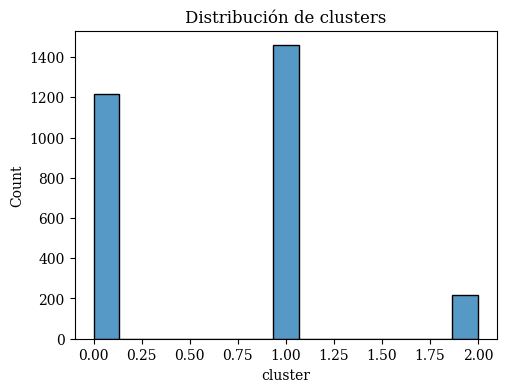

In [34]:
graficar_distribucion_histograma(X_est, 'cluster', 'Distribución de clusters')

Los rangos y distribucion de precios de cada cluster son:

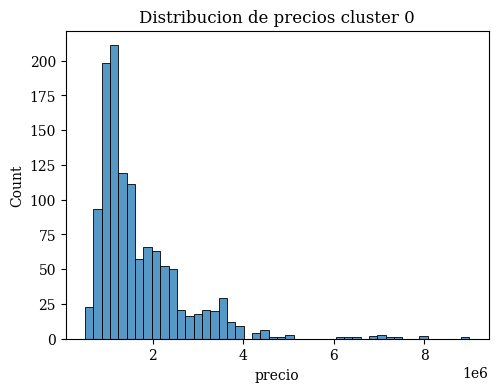

Cluster 0:  500000.0 9000000.0


In [35]:
graficar_distribucion_histograma( X_est[X_est['cluster']==0], 'precio', 'Distribucion de precios cluster 0')
print("Cluster 0: ", X_est[X_est['cluster']==0]['precio'].min(), X_est[X_est['cluster']==0]['precio'].max())


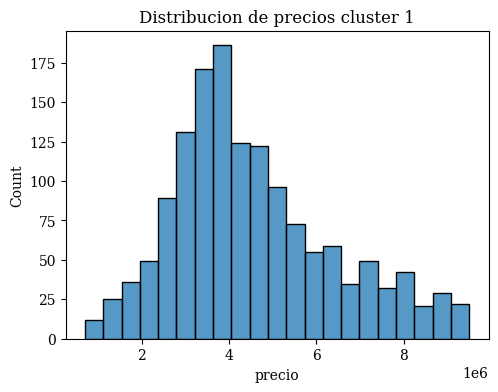

Cluster 1:  700000.0 9500000.0


In [36]:
graficar_distribucion_histograma( X_est[X_est['cluster']==1], 'precio', 'Distribucion de precios cluster 1')
print("Cluster 1: ", X_est[X_est['cluster']==1]['precio'].min(), X_est[X_est['cluster']==1]['precio'].max())

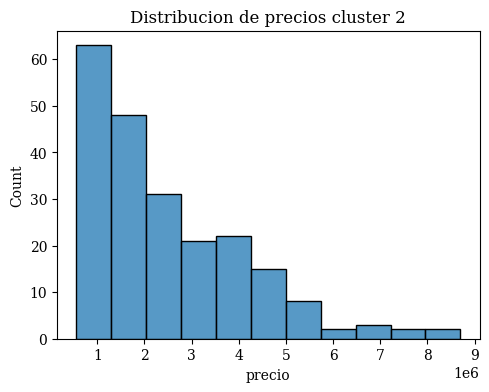

Cluster 2:  550000.0 8700000.0


In [37]:
graficar_distribucion_histograma( X_est[X_est['cluster']==2], 'precio', 'Distribucion de precios cluster 2')
print("Cluster 2: ", X_est[X_est['cluster']==2]['precio'].min(), X_est[X_est['cluster']==2]['precio'].max())

Cada cluster contiene un rango de diferentes precios, siendo el cluster 0 el rango mas amplio. Estas distribuciones darán paso a las iteraciones para los modelos que se ejecutaran bajo la siguiente estrategia:

- Solo se tendrá en cuenta el algoritmo xgboost, siendo este el de mejores resultados y rendiemiento
- Dado que en la iteración anteior se mostró una mejoría en métricas al seleccionar un rango de precios, para este caso, se selecciona la base de entrenamiento de acuerdo a los cluster lo cual nos resulta en 3 ejecuciones:
  - ejecución 1: Base de entrenamiento solo con datos de cluster 0
  - ejecución 2: Base de entrenamiento con datos de los clusters 0 y 1
  - ejecución 3: Base de entrenamiento con un porcentaje de datos de cada cluster

**Modelo XGBOOST**

La variacion de los hiperparámetros seleccionada y porcentaje de datos a usar de cada cluster corresponde al resultado de multiples ejecuciones observando los resultados obtenidos en los archivos csv que determinaron el aumento, disminución o eliminación de hiperparámetros.

**Ejecución 1: Base de entrenamiento solo con datos de cluster 0**

In [38]:
X_cluster_0 = X_est[X_est['cluster'] == 0]
imprimir_dimensiones(X_cluster_0)
x_model_0 = X_cluster_0.drop(columns = columns_disc_corr)
x_model_0 = x_model_0.drop(columns=['precio','cluster'])
y_model_0 = X_cluster_0['precio']
imprimir_dimensiones(x_model_0)

Numero de muestras: 1217, Número de columnas: 38
Numero de muestras: 1217, Número de columnas: 22


In [39]:
x_train_0, x_test_0, y_train_0, y_test_0 = train_test_split(x_model_0, y_model_0, test_size = 0.25, train_size = 0.75, random_state = 17)
print("Tamaño de los Datos de Entrenamiento = ", x_train_0.shape)
print("Tamaño de los Datos de Validación = ", x_test_0.shape)
print("Tamaño del Vector de Clases de Entrenamiento = ", y_train_0.shape)
print("Tamaño del Vector de Clases de Prueba = ", y_test_0.shape)

Tamaño de los Datos de Entrenamiento =  (912, 22)
Tamaño de los Datos de Validación =  (305, 22)
Tamaño del Vector de Clases de Entrenamiento =  (912,)
Tamaño del Vector de Clases de Prueba =  (305,)


In [40]:
for column in x_train_0.columns:
    if column not in ['area_bruta', 'tipo_cocina_fre', 'tipo_pisos_freq']:
        x_train_0[column] = x_train_0[column].astype('float') 

for column in x_test_0.columns:
    if column not in ['area_bruta', 'tipo_cocina_fre', 'tipo_pisos_freq']:
        x_test_0[column] = x_test_0[column].astype('float') 

param_grid_xgb = ParameterGrid({
    'n_estimators' : [80, 100, 120, 140],
    'max_depth' : [5, 7, 9, 10, 11],
    'learning_rate' : [.02,.03, .05],
    'objective' : ['reg:squarederror'],
    'subsample' : [0.2, 0.3, 0.5],
    'eta' : [.01, .05, .07],
})
# Ejecuciones del modelo
ejecutar_modelo(model = "XGBRegressor", 
                x_train=x_train_0, 
                y_train=y_train_0, 
                x_test=x_test_0, 
                y_test=y_test_0, 
                params=param_grid_xgb, 
                filename='XGBRegressor_cluster_0')

Modelo: {'eta': 0.01, 'learning_rate': 0.02, 'max_depth': 5, 'n_estimators': 80, 'objective': 'reg:squarederror', 'subsample': 0.2}
Modelo: {'eta': 0.01, 'learning_rate': 0.02, 'max_depth': 5, 'n_estimators': 80, 'objective': 'reg:squarederror', 'subsample': 0.3}
Modelo: {'eta': 0.01, 'learning_rate': 0.02, 'max_depth': 5, 'n_estimators': 80, 'objective': 'reg:squarederror', 'subsample': 0.5}
Modelo: {'eta': 0.01, 'learning_rate': 0.02, 'max_depth': 5, 'n_estimators': 100, 'objective': 'reg:squarederror', 'subsample': 0.2}
Modelo: {'eta': 0.01, 'learning_rate': 0.02, 'max_depth': 5, 'n_estimators': 100, 'objective': 'reg:squarederror', 'subsample': 0.3}
Modelo: {'eta': 0.01, 'learning_rate': 0.02, 'max_depth': 5, 'n_estimators': 100, 'objective': 'reg:squarederror', 'subsample': 0.5}
Modelo: {'eta': 0.01, 'learning_rate': 0.02, 'max_depth': 5, 'n_estimators': 120, 'objective': 'reg:squarederror', 'subsample': 0.2}
Modelo: {'eta': 0.01, 'learning_rate': 0.02, 'max_depth': 5, 'n_estimato

**Ejecución 2: Base de entrenamiento con datos cluster 1**

In [36]:
X_cluster_1 = X_est[X_est['cluster'] == 1]
imprimir_dimensiones(X_cluster_1)
x_model_1 = X_cluster_1.drop(columns = columns_disc_corr)
x_model_1 = x_model_1.drop(columns=['precio','cluster'])
y_model_1 = X_cluster_1['precio']
imprimir_dimensiones(x_model_1)

Numero de muestras: 1458, Número de columnas: 38
Numero de muestras: 1458, Número de columnas: 22


In [37]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_model_1, y_model_1, test_size = 0.25, train_size = 0.75, random_state = 17)
print("Tamaño de los Datos de Entrenamiento = ", x_train_1.shape)
print("Tamaño de los Datos de Validación = ", x_test_1.shape)
print("Tamaño del Vector de Clases de Entrenamiento = ", y_train_1.shape)
print("Tamaño del Vector de Clases de Prueba = ", y_test_1.shape)

Tamaño de los Datos de Entrenamiento =  (1093, 22)
Tamaño de los Datos de Validación =  (365, 22)
Tamaño del Vector de Clases de Entrenamiento =  (1093,)
Tamaño del Vector de Clases de Prueba =  (365,)


In [39]:
for column in x_train_1.columns:
    if column not in ['area_bruta', 'tipo_cocina_fre', 'tipo_pisos_freq']:
        x_train_1[column] = x_train_1[column].astype('float') 

for column in x_test_1.columns:
    if column not in ['area_bruta', 'tipo_cocina_fre', 'tipo_pisos_freq']:
        x_test_1[column] = x_test_1[column].astype('float') 

param_grid_xgb = ParameterGrid({
    'n_estimators' : [60,80, 100, 130],
    'max_depth' : [4,5, 7, 9],
    'learning_rate' : [.01,.02,.03, .04],
    'objective' : ['reg:squarederror'],
    'gamma' : [0, 50, 100],
    'colsample_bytree': [.2,0.3, 0.4, 1],
    'subsample' : [0.2, 0.3],
    'eta' : [.01, .05, .07],
})
# Ejecuciones del modelo
ejecutar_modelo(model = "XGBRegressor", 
                x_train=x_train_1, 
                y_train=y_train_1, 
                x_test=x_test_1, 
                y_test=y_test_1, 
                params=param_grid_xgb, 
                filename='XGBRegressor_cluster_1')

Modelo: {'colsample_bytree': 0.2, 'eta': 0.01, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 60, 'objective': 'reg:squarederror', 'subsample': 0.2}
Modelo: {'colsample_bytree': 0.2, 'eta': 0.01, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 60, 'objective': 'reg:squarederror', 'subsample': 0.3}
Modelo: {'colsample_bytree': 0.2, 'eta': 0.01, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 80, 'objective': 'reg:squarederror', 'subsample': 0.2}
Modelo: {'colsample_bytree': 0.2, 'eta': 0.01, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 80, 'objective': 'reg:squarederror', 'subsample': 0.3}
Modelo: {'colsample_bytree': 0.2, 'eta': 0.01, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100, 'objective': 'reg:squarederror', 'subsample': 0.2}
Modelo: {'colsample_bytree': 0.2, 'eta': 0.01, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100, 'objective': 'reg:squarederror', 's

**Ejecución 1: Base de entrenamiento solo con datos de cluster 2**

In [48]:
X_cluster_2 = X_est[X_est['cluster'] == 2]
imprimir_dimensiones(X_cluster_2)
x_model_2 = X_cluster_2.drop(columns = columns_disc_corr)
x_model_2 = x_model_2.drop(columns=['precio','cluster'])
y_model_2 = X_cluster_2['precio']
imprimir_dimensiones(x_model_2)

Numero de muestras: 217, Número de columnas: 38
Numero de muestras: 217, Número de columnas: 22


In [49]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_model_2, y_model_2, test_size = 0.2, train_size = 0.8, random_state = 17)
print("Tamaño de los Datos de Entrenamiento = ", x_train_2.shape)
print("Tamaño de los Datos de Validación = ", x_test_2.shape)
print("Tamaño del Vector de Clases de Entrenamiento = ", y_train_2.shape)
print("Tamaño del Vector de Clases de Prueba = ", y_test_2.shape)

Tamaño de los Datos de Entrenamiento =  (173, 22)
Tamaño de los Datos de Validación =  (44, 22)
Tamaño del Vector de Clases de Entrenamiento =  (173,)
Tamaño del Vector de Clases de Prueba =  (44,)


In [50]:
for column in x_train_2.columns:
    if column not in ['area_bruta', 'tipo_cocina_fre', 'tipo_pisos_freq']:
        x_train_2[column] = x_train_2[column].astype('float') 

for column in x_test_2.columns:
    if column not in ['area_bruta', 'tipo_cocina_fre', 'tipo_pisos_freq']:
        x_test_2[column] = x_test_2[column].astype('float') 

param_grid_xgb = ParameterGrid({
    'n_estimators' : [60,80, 100, 130],
    'max_depth' : [4,5, 7, 9],
    'learning_rate' : [.01,.02,.03, .04],
    'objective' : ['reg:squarederror'],
    'gamma' : [0, 50, 100],
    'colsample_bytree': [.2,0.3, 0.4, 1],
    'subsample' : [0.2, 0.3],
    'eta' : [.01, .05, .07],
})
# Ejecuciones del modelo
ejecutar_modelo(model = "XGBRegressor", 
                x_train=x_train_2, 
                y_train=y_train_2, 
                x_test=x_test_2, 
                y_test=y_test_2, 
                params=param_grid_xgb, 
                filename='XGBRegressor_cluster_2')

Modelo: {'eta': 0.01, 'learning_rate': 0.02, 'max_depth': 5, 'n_estimators': 80, 'objective': 'reg:squarederror', 'subsample': 0.2}
Modelo: {'eta': 0.01, 'learning_rate': 0.02, 'max_depth': 5, 'n_estimators': 80, 'objective': 'reg:squarederror', 'subsample': 0.3}
Modelo: {'eta': 0.01, 'learning_rate': 0.02, 'max_depth': 5, 'n_estimators': 80, 'objective': 'reg:squarederror', 'subsample': 0.5}
Modelo: {'eta': 0.01, 'learning_rate': 0.02, 'max_depth': 5, 'n_estimators': 100, 'objective': 'reg:squarederror', 'subsample': 0.2}
Modelo: {'eta': 0.01, 'learning_rate': 0.02, 'max_depth': 5, 'n_estimators': 100, 'objective': 'reg:squarederror', 'subsample': 0.3}
Modelo: {'eta': 0.01, 'learning_rate': 0.02, 'max_depth': 5, 'n_estimators': 100, 'objective': 'reg:squarederror', 'subsample': 0.5}
Modelo: {'eta': 0.01, 'learning_rate': 0.02, 'max_depth': 5, 'n_estimators': 120, 'objective': 'reg:squarederror', 'subsample': 0.2}
Modelo: {'eta': 0.01, 'learning_rate': 0.02, 'max_depth': 5, 'n_estimato

**Consolidación de mejores resultados:**

Dada las ejecuciones de los modelos con la variación de sus hiperparámetros, se consolida los mejores resultados obtenidos de cada ejcución. Cabe resaltar que algunas combinaciones de parámetros tienen los mismos resultados en métricas.

**XGBoost: cluster 0**

| R2_train | R2_test | RMSE_train | RMSE_test | MAPE_train | MAPE_test | Eta | Learning rate | Max depth | N estimators | Objetive | Subsample |
| --- | --- |  --- |  --- |  --- |  --- |  --- | --- | --- |  --- |  --- | --- |
| 0.75 | 0.71 | 511152.68 | 504298.55 | 0.15 | 0.15 | 0.01  | 0.03 | 9 | 100 | reg:squarederror | 0.2 |

**XGBoost: cluster 0 y 1**

| R2_train | R2_test | RMSE_train | RMSE_test | MAPE_train | MAPE_test | Eta | Learning rate | Max depth | N estimators | Objetive | Subsample |
| --- | --- |  --- |  --- |  --- |  --- |  --- | --- | --- |  --- |  --- | --- |
| 0.79 | 0.75 | 950955.44 | 1073306.36 | 0.17 | 0.19 | 0.01  | 0.03 | 5 | 80 | reg:squarederror | 0.3 |

**XGBoost: cluster 0 1 y 2**

Datos de cluster 0 con una porcion de datos del cluster 1 y 2

| R2_train | R2_test | RMSE_train | RMSE_test | MAPE_train | MAPE_test | Eta | Learning rate | Max depth | N estimators | Objetive | Subsample |
| --- | --- |  --- |  --- |  --- |  --- |  --- | --- | --- |  --- |  --- | --- |
| 0.9 | 0.86 | 556334.30 | 699427.97 | 0.12 | 0.15 | 0.01  | 0.03 | 10| 100 | reg:squarederror | 0.3 |

**Conclusiones**

- La implementación del algoritmo kmeans ha dejado como resultado 3 cluster para clasificar los datos, este modelo debe ser parte de la implementación pues determina el punto de entrada para la predicción del precio de arriendos
- Esta estrategia ha sido exitosa pues se ha logrado la métrica propuesta por el negocio (MAPE <= 0.15)
- Con la ejecución del cluster 0 se obtiene un modelo con el MAPE = 0.15, sin embargo, para dar mas cobertura a los datos se busca agregar mas información de los demás cluster siempre conservando la métrica lograda
- El algoritmo con mejores resultados a lo largo de las iteraciones ha sido xgboost con una combinación de datos de los tres clusters
- En la iteración final de este proyecto se entrenará un xgboost con la combinación de hiperparámetros que ha mostrado mejores resultados. A este se le aplicará un método de validación cruzada, un rastreo de importancia de variables para determinar la cantidad final de variables predictoras y un análisis de efectividad del modelo sobre diferentes zonas para dar recomendación de implementación de este al negocio